<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0008_kNN_on_WDBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Imports

In [1]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

import kagglehub

# Data and Initial Sanity Checks

## Loading the data

In [2]:
kagglehub.dataset_download('uciml/breast-cancer-wisconsin-data')

'/kaggle/input/breast-cancer-wisconsin-data'

In [3]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

## Shape

In [4]:
df.shape

(569, 33)

## Columns

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [7]:
df.shape

(569, 31)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Missing Values

In [9]:
df.isna().any().any()

np.False_

So, no missing values in the entire dataset.

In [10]:
# df.isna().sum() # column-wise

In [11]:
# df.isnull().sum() # alternative

## Frequency Distribution of the Response Variable

In [12]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


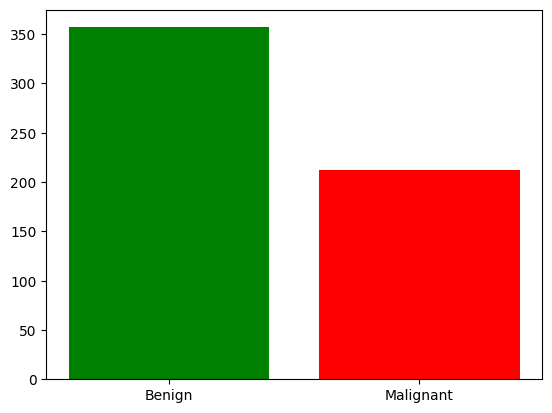

In [13]:
plt.bar(['Benign', 'Malignant'], [357, 212], color = ['green', 'red'])
plt.show()

# Train-Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size = 0.2, random_state = 2)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## Frequency Distribution in the training set

In [16]:
a = y_train.value_counts(); print(a)

diagnosis
B    288
M    167
Name: count, dtype: int64


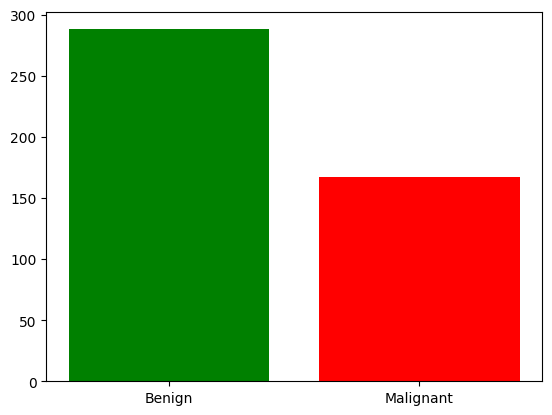

In [17]:
plt.bar(['Benign', 'Malignant'], a.values, color = ['green', 'red'])
plt.show()

# Scaling

In [18]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train[:2, :]

array([[-0.01330339,  1.7757658 , -0.01491962, -0.14478895,  0.22879041,
         0.17546662, -0.54440164, -0.1282563 , -1.01205427, -0.15270564,
        -0.11809273,  0.51565734,  0.03524556, -0.2057197 ,  0.09043522,
         0.08775907, -0.39162479,  0.79264996,  0.03869712,  0.64948729,
        -0.18639977,  1.18721279, -0.19614077, -0.2913543 , -0.33218215,
        -0.17136714, -0.65932952, -0.13236958, -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, -0.76561031, -1.01982093,
        -1.24905895, -0.94455384, -0.88909098, -1.109505  , -0.18616526,
        -0.91650146, -0.45422866, -0.90363301, -0.637863  , -0.36428848,
        -1.07873087, -0.82448558, -0.92858668, -0.04989848, -0.56863123,
        -0.94999203, -0.88456941, -0.98076453, -0.80649673, -1.24062985,
        -1.22454081, -1.07819957, -1.11552632, -0.85773964, -0.72098905]])

# Fitting

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

# Prediction on Test Set

In [21]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9736842105263158


# Search for optimal value of $k$

In [22]:
accuracies = []

for k in range(1, 21) :
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    accuracies.append(accuracy_score(y_test, y_pred))

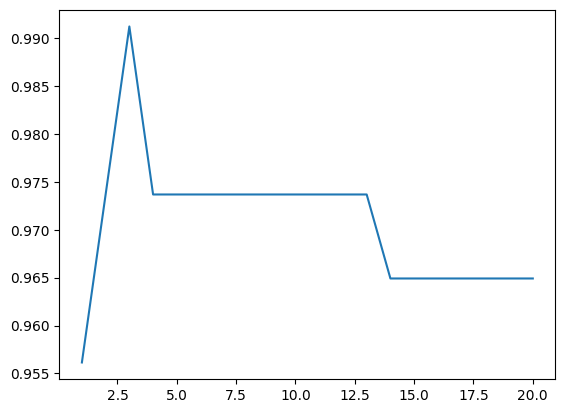

In [23]:
plt.plot(range(1, 21), accuracies)
plt.show()

So best choice for $k$ is 3.

# The Best Model

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9912280701754386
